# Final Project


Import the package

In [123]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
from scipy import stats

In [304]:
Cartier_win = pd.read_csv("Cartier+for+WinnersCurse.csv")
print(Cartier_win.info())
Cartier_win.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   auctionid   1348 non-null   int64  
 1   bid         1348 non-null   float64
 2   bidtime     1348 non-null   float64
 3   bidder      1348 non-null   object 
 4   bidderrate  1348 non-null   int64  
 5   openbid     1348 non-null   float64
 6   price       1348 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 73.8+ KB
None


,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
0,1638843936,500.0,0.478368,kona-java,181,500.0,1625.0
1,1638843936,800.0,0.826389,doc213,60,500.0,1625.0
2,1638843936,600.0,3.761123,zmxu,7,500.0,1625.0
3,1638843936,1500.0,5.226377,carloss8055,5,500.0,1625.0
4,1638843936,1600.0,6.570625,jdrinaz,6,500.0,1625.0


In [280]:
# Cartier_win_i = Cartier_win.set_index(["auctionid", "bidtime"]).sort_index(level=0)
# Cartier_win_i.head(10)

In [116]:
# Create the subdataframe for easier deal
Cartier_win_p = Cartier_win[["auctionid", "bidtime", "bid", "openbid"]]
Cartier_win_p.head()

,auctionid,bidtime,bid,openbid
0,1638843936,0.478368,500.0,500.0
1,1638843936,0.826389,800.0,500.0
2,1638843936,3.761123,600.0,500.0
3,1638843936,5.226377,1500.0,500.0
4,1638843936,6.570625,1600.0,500.0


In [279]:
# Get the number of auction and put auction_id into a list (sort the data)
count = Cartier_win["auctionid"].value_counts()
aucList = list(count.index)


In [140]:
# Group the dataframe
grouped = Cartier_win_p.groupby(Cartier_win_p.auctionid)

group = []

for g in aucList:
    
    temp = pd.DataFrame(grouped.get_group(g))
    temp = temp.reset_index(drop = True)
#     print(g)
#     drop_error(temp)

    group.append(temp)



In [278]:
rs = []
for i in group:
    data = pd.DataFrame({"y": np.log(i.bid), "x1": i.bidtime, "x2": i.openbid})
    
    model = smf.ols("y ~ x1 + x2+ x1*x2", data)
    result = model.fit()
    rs.append(result.rsquared)
#     print(result.rsquared)

<BarContainer object of 97 artists>

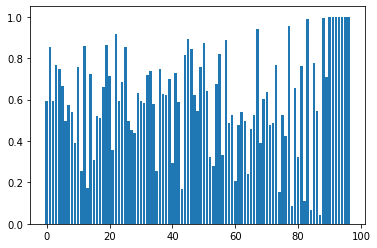

In [159]:
plt.bar(np.arange(len(rs)), rs)

In [178]:
data = pd.DataFrame({"y": (Cartier_win_p.bid), "x1": Cartier_win_p.bidtime, "x2": Cartier_win_p.openbid})

model = smf.ols("y ~ x1 + x2", data)
result = model.fit()

print(result.rsquared)
result.summary()

0.3279139864985664


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     328.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          8.77e-117
Time:                        12:25:04   Log-Likelihood:                -10396.
No. Observations:                1348   AIC:                         2.080e+04
Df Residuals:                    1345   BIC:                         2.081e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    324.2160     27.947     11.601      0.000     269.391     379.041
x1            33.1302      5.983      5.537      0.000      21.392      44.868
x2             0.9527      0.040     23.785      0.000       0.874       1.031
==============================================================================
Omnibus:                      451.227   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1217.806
Skew:                           1.769   Prob(JB):                    3.60e-265
Kurtosis:                       6.027   Cond. No.                         773.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

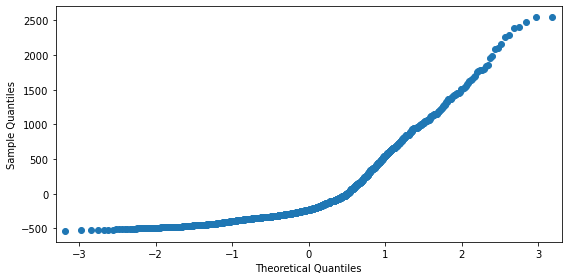

In [179]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)
fig.tight_layout()

In [277]:
# Draw the line for each group
# for i in group:
#     i.plot(x = "bidtime", y = "bid", figsize=(8, 4))
# plt.show()

## 3 Days Auction

In [260]:
Cartier_3d = pd.read_csv("Cartier+3-day+auctions.csv")
Cartier_3d_i = Cartier_3d.set_index(["auctionid", "bidtime"]).sort_index(level=0)
# Cartier_3d.info()
# Cartier_3d_i.head()

#### First model: $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$, which corresponds to the Patsy formula "`y ~ x1 + x2`"

In [290]:
data = pd.DataFrame({"y": (Cartier_3d_p.bid)**1.2, "x1": Cartier_3d_p.bidtime, "x2": Cartier_3d_p.openbid})

model = smf.ols("y ~ x1 + x2", data)
Cartier_3d_result = model.fit()
Cartier_3d_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     156.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           1.09e-44
Time:                        13:12:03   Log-Likelihood:                -2158.7
No. Observations:                 250   AIC:                             4323.
Df Residuals:                     247   BIC:                             4334.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -169.8927    204.358     -0.831      0.407    -572.399     232.613
x1           375.7737     89.100      4.217      0.000     200.281     551.267
x2             6.0631      0.352     17.222      0.000       5.370       6.756
==============================================================================
Omnibus:                      159.132   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1219.009
Skew:                           2.524   Prob(JB):                    1.98e-265
Kurtosis:                      12.568   Cond. No.                         750.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2st model: $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 $

In [291]:
data = pd.DataFrame({"y": (Cartier_3d_p.bid)**1.2, "x1": Cartier_3d_p.bidtime, "x2": Cartier_3d_p.openbid})

model = smf.ols("y ~ x1 + x2 + x1*x2", data)
Cartier_3d_result = model.fit()
Cartier_3d_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     105.4
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           6.51e-44
Time:                        13:12:09   Log-Likelihood:                -2157.9
No. Observations:                 250   AIC:                             4324.
Df Residuals:                     246   BIC:                             4338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.7039    254.158      0.117      0.907    -470.899     530.306
x1           282.8709    113.530      2.492      0.013      59.256     506.486
x2             4.8600      0.979      4.966      0.000       2.932       6.788
x1:x2          0.5621      0.427      1.317      0.189      -0.278       1.403
==============================================================================
Omnibus:                      154.355   Durbin-Watson:                   0.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1092.444
Skew:                           2.461   Prob(JB):                    6.01e-238
Kurtosis:                      11.981   Cond. No.                     2.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

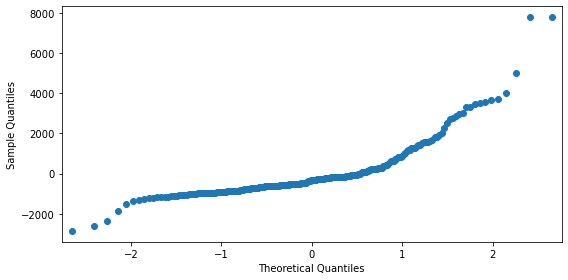

In [274]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(Cartier_3d_result.resid, ax=ax)
fig.tight_layout()

In [292]:
Cartier_3d_result.params

Intercept     29.703913
x1           282.870913
x2             4.859958
x1:x2          0.562114
dtype: float64

### Form the test data by another kinds of goods' 3 days auction

In [303]:
P3 = pd.read_csv("Palm+3-day+auctions.csv")
data = pd.DataFrame({"y": (P3.bid)**1.2, "x1": P3.bidtime, "x2": P3.openbid})

model = smf.ols("y ~ x1 + x2 + x1*x2", data)
P3_result = model.fit()
print(P3_result.summary(),"\n")
print(P3_result.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     647.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          3.86e-251
Time:                        13:18:25   Log-Likelihood:                -7748.3
No. Observations:                1216   AIC:                         1.550e+04
Df Residuals:                    1212   BIC:                         1.552e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.3985      9.967      6.060      0.0

In [300]:
def y_true(x1, x2):
    return P3_result.params[0]  + P3_result.params[1] * x1 + P3_result.params[2] * x2 + P3_result.params[3] * x1 * x2

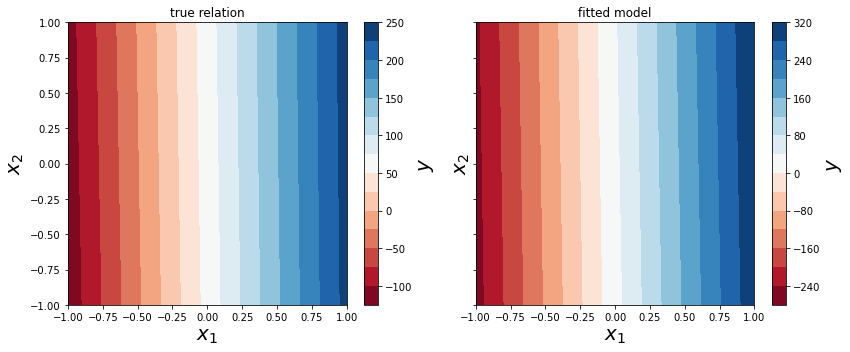

In [301]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()}) # ravel returns a contiguous flattened array.
y_pred = Cartier_3d_result.predict(new_data)

# the result is a vector
y_pred.shape

# resize the vector to a square matrix
y_pred = y_pred.values.reshape(50, 50)

# plot the true data and the fitted model
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

fig.tight_layout()

## 5 Days Auction

In [191]:
Cartier_5d = pd.read_csv("Cartier+5-day+auctions.csv")
Cartier_5d_i = Cartier_5d.set_index(["auctionid", "bidtime"]).sort_index(level=0)
Cartier_5d.info()
Cartier_5d_i.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   auctionid   355 non-null    int64  
 1   bid         355 non-null    float64
 2   bidtime     355 non-null    float64
 3   bidder      355 non-null    object 
 4   bidderrate  355 non-null    int64  
 5   openbid     355 non-null    float64
 6   price       355 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 19.5+ KB


bid           bidder  bidderrate  openbid   price
auctionid  bidtime                                                       
1639826019 2.090127  1000.0          talwang         172   899.99  2025.0
           2.355451   926.0         traderpy           2   899.99  2025.0
           2.760602  1150.0             vkns          46   899.99  2025.0
           3.707789  1100.0  lennytartamella           0   899.99  2025.0
           3.708565  1200.0  lennytartamella           0   899.99  2025.0

#### First model: $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$, which corresponds to the Patsy formula "`y ~ x1 + x2`"

In [282]:
# Create the subdataframe for easier deal
Cartier_5d_p = Cartier_5d[["auctionid", "bidtime", "bid", "openbid"]]
Cartier_5d_p.head()
data = pd.DataFrame({"y": (Cartier_5d_p.bid)**3.4, "x1": Cartier_5d_p.bidtime, "x2": Cartier_5d_p.openbid})

model = smf.ols("y ~ x1 + x2", data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     320.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           5.34e-80
Time:                        12:58:05   Log-Likelihood:                -9007.9
No. Observations:                 355   AIC:                         1.802e+04
Df Residuals:                     352   BIC:                         1.803e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -5.3e+09   2.54e+09     -2.085      0.038   -1.03e+10   -3.01e+08
x1          2.996e+09   8.02e+08      3.737      0.000    1.42e+09    4.57e+09
x2          8.495e+07   3.72e+06     22.816      0.000    7.76e+07    9.23e+07
==============================================================================
Omnibus:                       89.958   Durbin-Watson:                   0.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.396
Skew:                           1.132   Prob(JB):                     2.14e-61
Kurtosis:                       6.710   Cond. No.                         804.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2st model: $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 $

In [284]:
# Create the subdataframe for easier deal
Cartier_5d_p = Cartier_5d[["auctionid", "bidtime", "bid", "openbid"]]
Cartier_5d_p.head()
data = pd.DataFrame({"y": (Cartier_5d_p.bid)**3.4, "x1": Cartier_5d_p.bidtime, "x2": Cartier_5d_p.openbid})

model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     279.4
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           1.23e-92
Time:                        13:00:36   Log-Likelihood:                -8975.3
No. Observations:                 355   AIC:                         1.796e+04
Df Residuals:                     351   BIC:                         1.797e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.156e+08   2.42e+09      0.172      0.864   -4.34e+09    5.18e+09
x1          1.763e+09   7.47e+08      2.360      0.019    2.94e+08    3.23e+09
x2         -5.195e+07   1.66e+07     -3.121      0.002   -8.47e+07   -1.92e+07
x1:x2       3.056e+07   3.64e+06      8.400      0.000    2.34e+07    3.77e+07
==============================================================================
Omnibus:                      104.979   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.638
Skew:                           1.331   Prob(JB):                     1.18e-71
Kurtosis:                       6.873   Cond. No.                     3.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

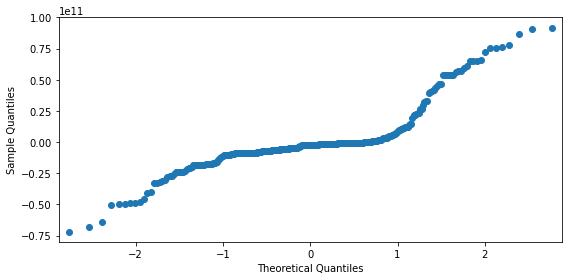

In [285]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)
fig.tight_layout()

In [287]:
result.params

Intercept    4.155728e+08
x1           1.763410e+09
x2          -5.195271e+07
x1:x2        3.056457e+07
dtype: float64

## 7 Days Auction

In [276]:
Cartier_7d = pd.read_csv("Cartier+7-day+auctions.csv")
Cartier_7d_i = Cartier_7d.set_index(["auctionid", "bidtime"]).sort_index(level=0)
# Cartier_7d.info()
# Cartier_7d_i.head()

In [253]:
# Create the subdataframe for easier deal
Cartier_7d_p = Cartier_7d[["auctionid", "bidtime", "bid", "openbid"]]
Cartier_7d_p.head()
data = pd.DataFrame({"y": (Cartier_7d_p.bid)**3.2, "x1": Cartier_7d_p.bidtime, "x2": Cartier_7d_p.openbid})

model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     722.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          9.97e-280
Time:                        12:41:15   Log-Likelihood:                -34410.
No. Observations:                1348   AIC:                         6.883e+04
Df Residuals:                    1344   BIC:                         6.885e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.586e+09   1.67e+09      2.745      0.006    1.31e+09    7.86e+09
x1         -1.961e+09   3.49e+08     -5.612      0.000   -2.65e+09   -1.28e+09
x2         -2.043e+07    7.8e+06     -2.620      0.009   -3.57e+07   -5.14e+06
x1:x2       1.919e+07   1.25e+06     15.405      0.000    1.67e+07    2.16e+07
==============================================================================
Omnibus:                      871.479   Durbin-Watson:                   0.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55224.499
Skew:                           2.266   Prob(JB):                         0.00
Kurtosis:                      34.027   Cond. No.                     5.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

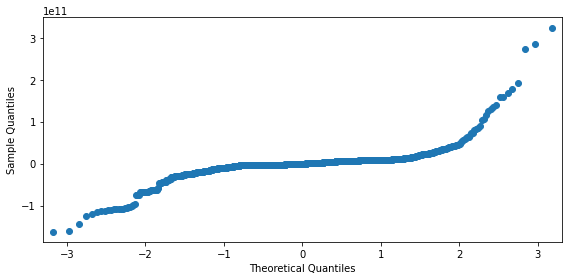

In [254]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)
fig.tight_layout()

# Appendix

In [ ]:
# Process to find and drop the error data
pre_bid = 15
i = 1
if a.iloc[i].bid<pre_bid:
    print(i)
    a.drop([i-1], inplace=False)     # a.index[i] is the absolute sequence, only [i] is the index of the data frame
    
# Method to drop the error data rows
def drop_error(a, i=1):
    
    if a.iloc[i].bid<a.iloc[i-1].bid:   # a.iloc[i] the i-th row of dataframe
#         print(i)        
        a.drop([i-1], inplace=True)     # a.index[i] is the absolute sequence, only [i] is the index of the data frame
       
    i = i+1
    
    if i == len(a):
        return a
    drop_error(a, i)
    
# Test if the method drop_error work
temp = pd.DataFrame(grouped.get_group(1650483277))
temp = temp.reset_index(drop = True)

# drop_error(temp)
# temp

In [261]:
# Create the subdataframe for easier deal
Cartier_3d_p = Cartier_3d[["auctionid", "bidtime", "bid", "openbid"]]
Cartier_3d_p.head()

# Get the number of auction and put auction_id into a list (useful to sort the data)
count = Cartier_3d_p["auctionid"].value_counts()
aucList = list(count.index)

# Group the dataframe
grouped = Cartier_3d_p.groupby(Cartier_3d_p.auctionid)

group_3d = []

for g in aucList:
    
    temp = pd.DataFrame(grouped.get_group(g))
    temp = temp.reset_index(drop = True)
#     print(g)
#     drop_error(temp)
    group_3d.append(temp)
    
# Find R-squared for every single model
rs_3d = []
for i in group_3d:
    data = pd.DataFrame({"y": np.log(i.bid), "x1": i.bidtime, "x2": i.openbid})
    
    model = smf.ols("y ~ x1 + x2", data)
    result = model.fit()
    rs_3d.append(result.rsquared)

# Plot a diagram for the R-squared
# plt.bar(np.arange(len(rs)), rs)

,auctionid,bidtime,bid,openbid
0,1638893549,2.230949,175.0,99.0
1,1638893549,2.600116,100.0,99.0
2,1638893549,2.600810,120.0,99.0
3,1638893549,2.601076,150.0,99.0
4,1638893549,2.909826,177.5,99.0
